Last Updated: 7-29-2017

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Set-Operations-with-Overlay" data-toc-modified-id="Set-Operations-with-Overlay-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set-Operations with Overlay</a></div><div class="lev2 toc-item"><a href="#The-different-Overlay-operations" data-toc-modified-id="The-different-Overlay-operations-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The different Overlay operations</a></div><div class="lev3 toc-item"><a href="#Union" data-toc-modified-id="Union-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Union</a></div><div class="lev3 toc-item"><a href="#Intersection" data-toc-modified-id="Intersection-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Intersection</a></div><div class="lev3 toc-item"><a href="#Symmetric-Difference" data-toc-modified-id="Symmetric-Difference-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Symmetric Difference</a></div><div class="lev3 toc-item"><a href="#Difference" data-toc-modified-id="Difference-114"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Difference</a></div><div class="lev3 toc-item"><a href="#Identity" data-toc-modified-id="Identity-115"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Identity</a></div><div class="lev2 toc-item"><a href="#Overaly-Countries-Example" data-toc-modified-id="Overaly-Countries-Example-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Overaly Countries Example</a></div>

# Set-Operations with Overlay

- When working with multiple spatial datasets - especially multiple polygon or line datasets - users often wish to create new shapes based on places where those datasets overlap (or don't overlap).

- These manipulations are often referred using the language of sets:
    - intersections
    - unions
    - differences
    
- These types of operations are made available in geopandas library through the ```overlay``` function.

![](https://i.imgur.com/SvADaqm.png)



- Spatial overlays allow you to compare two GeoDataFrames containing polygon or multipolygon geometries and create a new GeoDataFrame with the new geometries representing teh spatial combination and merged particles. This allows you to answer questions like
> What are the demographics of the census tracts within 1000 ft of the highway?


- The basic idea is demonstrated by the graphic below but keep in mind that overlays operate at the dataframe level, not on individual geometries, and the properties from both are retrained.


## The different Overlay operations

- First, we create some example data

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16, 20)
from shapely.geometry import Point, Polygon

In [2]:
p1 = Polygon([(0,0), (2,0), (2,2), (0,2)])
p2 = Polygon([(2,2), (4,2), (4,4), (2,4)])
p3 = Polygon([(1,1), (3,1), (3,3), (1,3)])
p4 = Polygon([(3,3), (5,3), (5,5), (3,5)])


In [3]:
polys1 = gpd.GeoSeries([p1, p2])
polys2 = gpd.GeoSeries([p3, p4])
polys1

0    POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))
1    POLYGON ((2 2, 4 2, 4 4, 2 4, 2 2))
dtype: object

In [4]:
polys2

0    POLYGON ((1 1, 3 1, 3 3, 1 3, 1 1))
1    POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))
dtype: object

In [5]:
df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1, 2]})
df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1, 2]})
df1

,df1,geometry
0,1,"POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))"
1,2,"POLYGON ((2 2, 4 2, 4 4, 2 4, 2 2))"


- These two GeoDataFrames have some overlapping areas:

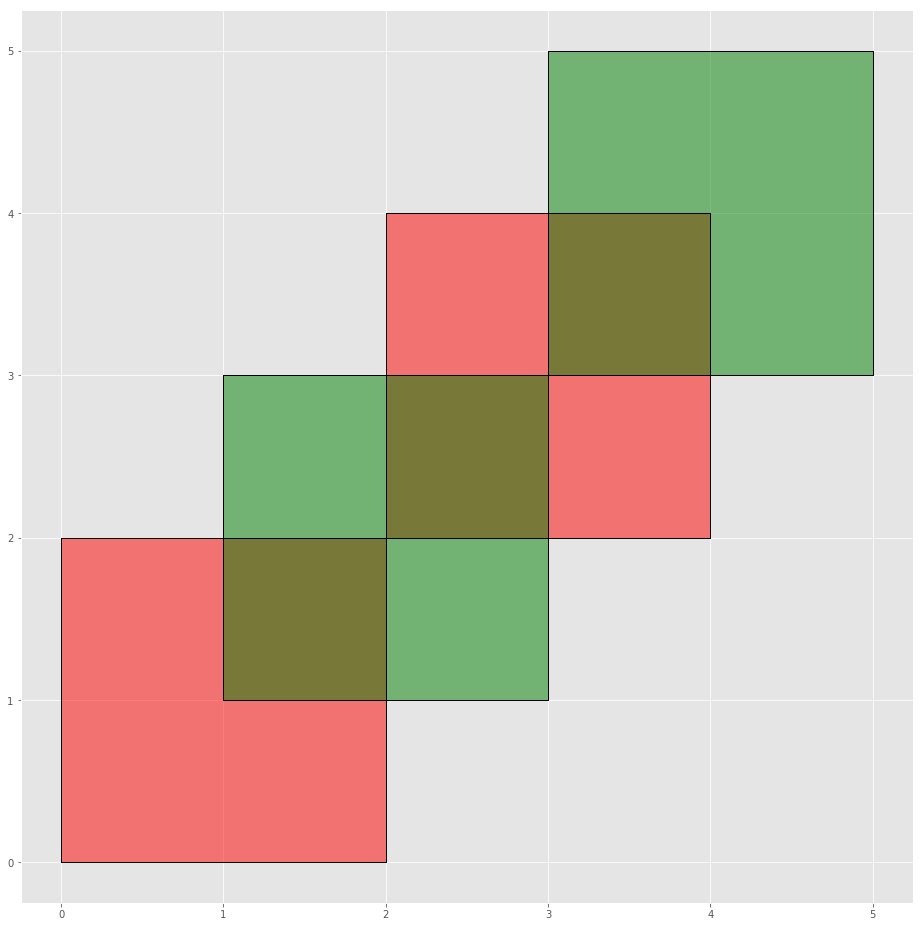

In [6]:
ax = df1.plot(color='red')
df2.plot(ax=ax, color='green')

- The ```overlay``` function will determine the set of all individual geometries from overlaying the two input GeoDataFrames.
- This result covers the area covered by the two input GeoDataFrames. This result covers the area covered by the two input GeoDataFrames, and also preserves all unique regions defined by the combined boundaries of the two GeoDataFrames.

### Union

- When using ```how='union'```, all those possible geometries are returned:

In [7]:
res_union = gpd.overlay(df1, df2, how='union')
res_union

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((2 1, 2 0, 0 0, 0 2, 1 2, 1 1, 2 1))"
1,1.0,1.0,"POLYGON ((2 1, 1 1, 1 2, 2 2, 2 1))"
2,NaN,1.0,"POLYGON ((2 1, 2 2, 3 2, 3 1, 2 1))"
3,NaN,1.0,"POLYGON ((2 2, 1 2, 1 3, 2 3, 2 2))"
4,2.0,NaN,"POLYGON ((3 2, 3 3, 4 3, 4 2, 3 2))"
5,2.0,1.0,"POLYGON ((3 3, 3 2, 2 2, 2 3, 3 3))"
6,2.0,NaN,"POLYGON ((3 3, 2 3, 2 4, 3 4, 3 3))"
7,NaN,2.0,"POLYGON ((4 3, 4 4, 3 4, 3 5, 5 5, 5 3, 4 3))"
8,2.0,2.0,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"


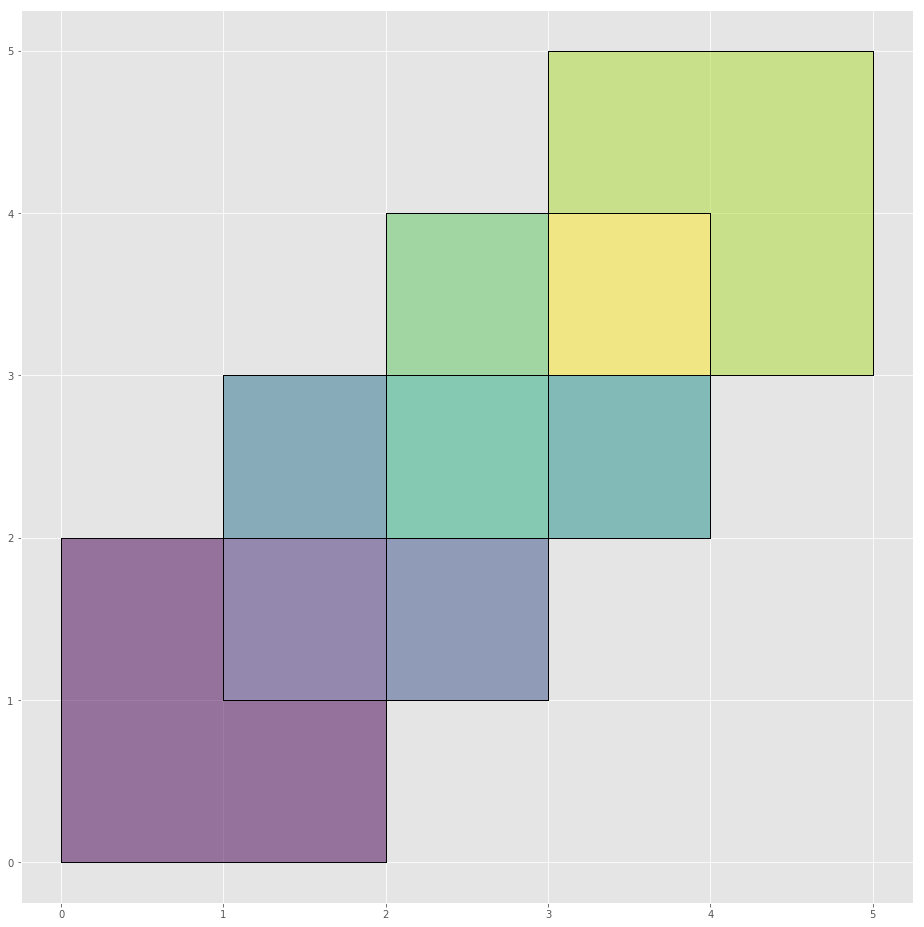

In [8]:
ax = res_union.plot()
df1.plot(ax=ax, facecolor='none')
df2.plot(ax=ax, facecolor='none')

### Intersection

- The other ```how``` operations will return different subsets of those geometries. With ```how='intersection'```, it returns only those geometries that are contained by both GeoDataFrames.

In [21]:
res_intersection = gpd.overlay(df1, df2, how='intersection')
res_intersection

,df1,df2,geometry
0,1,1,"POLYGON ((2 1, 1 1, 1 2, 2 2, 2 1))"
1,2,1,"POLYGON ((3 3, 3 2, 2 2, 2 3, 3 3))"
2,2,2,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"


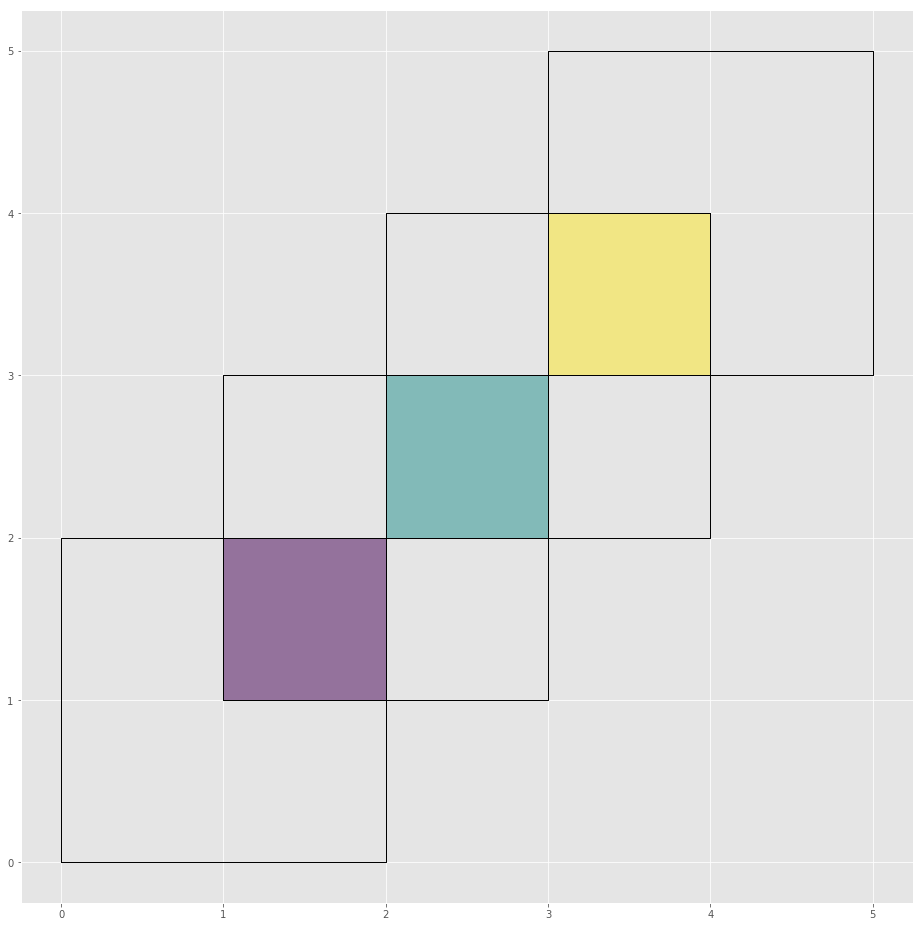

In [22]:
ax = res_intersection.plot()
df1.plot(ax=ax, facecolor='none')
df2.plot(ax=ax, facecolor='none')

### Symmetric Difference

 - ```how='symmetric_difference'``` is the opposite of ```intersection``` and returns the geometries that are only part of one of the GeoDataFrames but not both:

In [23]:
res_symdiff = gpd.overlay(df1, df2, how='symmetric_difference')
res_symdiff

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((2 1, 2 0, 0 0, 0 2, 1 2, 1 1, 2 1))"
1,NaN,1.0,"POLYGON ((2 1, 2 2, 3 2, 3 1, 2 1))"
2,NaN,1.0,"POLYGON ((2 2, 1 2, 1 3, 2 3, 2 2))"
3,2.0,NaN,"POLYGON ((3 2, 3 3, 4 3, 4 2, 3 2))"
4,2.0,NaN,"POLYGON ((3 3, 2 3, 2 4, 3 4, 3 3))"
5,NaN,2.0,"POLYGON ((4 3, 4 4, 3 4, 3 5, 5 5, 5 3, 4 3))"


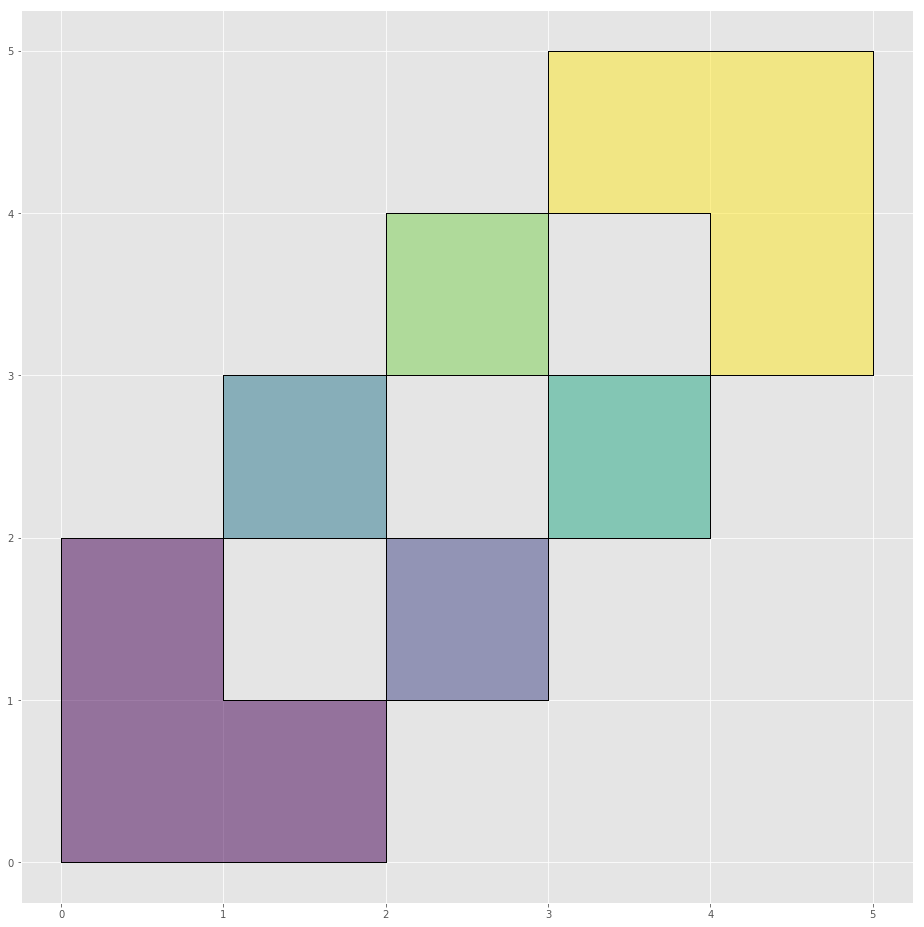

In [24]:
ax = res_symdiff.plot()
df1.plot(ax=ax, facecolor='none')
df2.plot(ax=ax, facecolor='none')

### Difference

- To obtain the geometries that are part of ```df1``` but are not contained in ```df2```, you can use ```how='difference'```.

In [9]:
res_difference = gpd.overlay(df1, df2, how='difference')
res_difference

,df1,df2,geometry
0,1,None,"POLYGON ((2 1, 2 0, 0 0, 0 2, 1 2, 1 1, 2 1))"
1,2,None,"POLYGON ((3 2, 3 3, 4 3, 4 2, 3 2))"
2,2,None,"POLYGON ((3 3, 2 3, 2 4, 3 4, 3 3))"


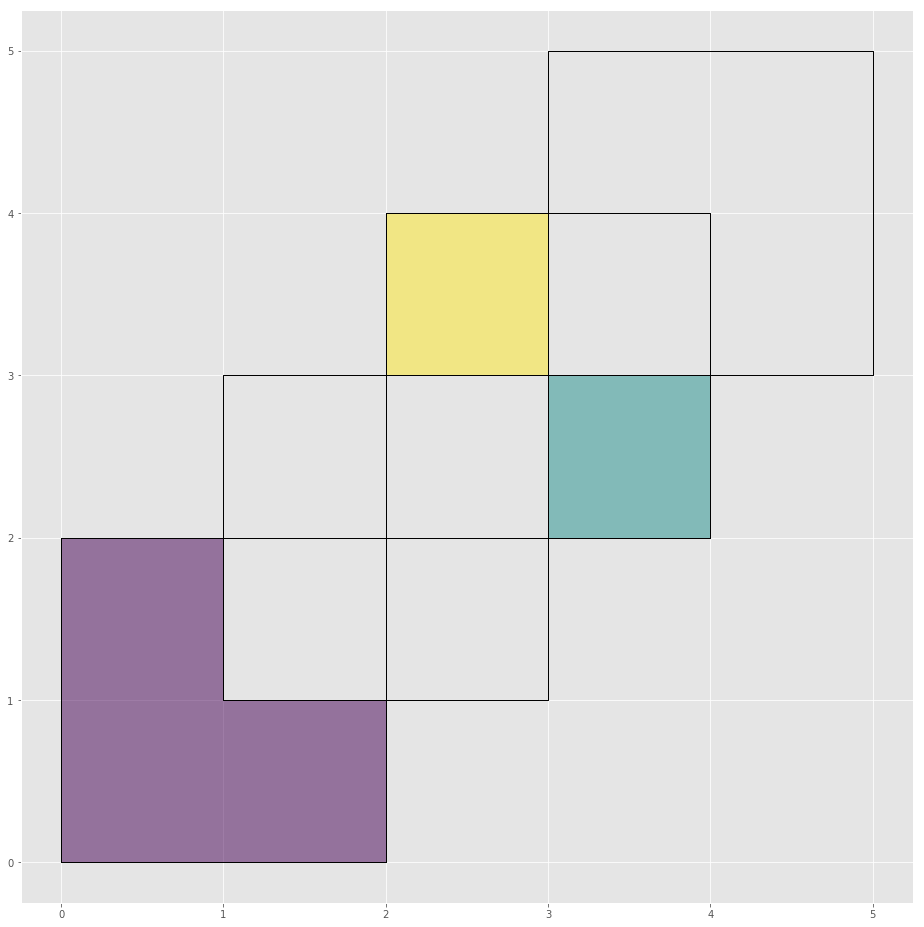

In [11]:
ax = res_difference.plot()
df1.plot(ax=ax, facecolor='none')
df2.plot(ax=ax, facecolor='none')

### Identity
- Finally, with ```how='identity'```, the result consists of the surface of ```df1```, but with  the geometries obtained from overlaying ```df1``` with ```df2```:

In [12]:
res_identity = gpd.overlay(df1, df2, how='identity')
res_identity

,df1,df2,geometry
0,1,NaN,"POLYGON ((2 1, 2 0, 0 0, 0 2, 1 2, 1 1, 2 1))"
1,1,1.0,"POLYGON ((2 1, 1 1, 1 2, 2 2, 2 1))"
2,2,NaN,"POLYGON ((3 2, 3 3, 4 3, 4 2, 3 2))"
3,2,1.0,"POLYGON ((3 3, 3 2, 2 2, 2 3, 3 3))"
4,2,NaN,"POLYGON ((3 3, 2 3, 2 4, 3 4, 3 3))"
5,2,2.0,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"


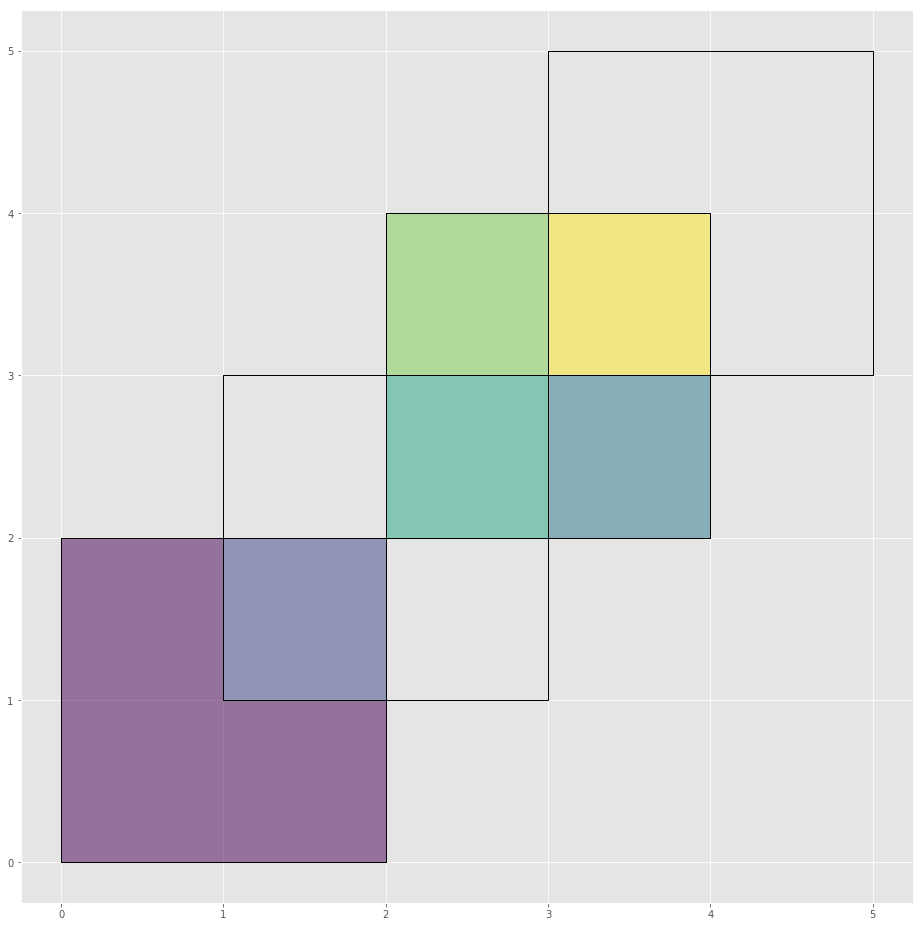

In [13]:
ax = res_identity.plot()
df1.plot(ax=ax, facecolor='none')
df2.plot(ax=ax, facecolor='none')

## Overaly Countries Example

- First, we load the countries and cities example datasets and select:

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

- Select South America and some columns

In [15]:
countries = world[world['continent'] == "South America"]
countries = countries[['geometry', 'name']]
countries

,geometry,name
4,(POLYGON ((-65.50000000000003 -55.199999999999...,Argentina
21,POLYGON ((-62.84646847192156 -22.0349854468694...,Bolivia
22,POLYGON ((-57.62513342958296 -30.2162948544542...,Brazil
29,(POLYGON ((-68.63401022758316 -52.636370458874...,Chile
35,POLYGON ((-75.37322323271385 -0.15203175212045...,Colombia
46,POLYGON ((-80.30256059438722 -3.40485645916471...,Ecuador
54,"POLYGON ((-61.2 -51.85, -60 -51.25, -59.15 -51...",Falkland Is.
67,POLYGON ((-59.75828487815919 8.367034816924047...,Guyana
124,POLYGON ((-69.59042375352405 -17.5800118954193...,Peru
131,POLYGON ((-62.68505713565789 -22.2490292294223...,Paraguay


- Project to crs that uses meters as distance measure

In [16]:
countries = countries.to_crs('+init=epsg:3395')
capitals = capitals.to_crs('+init=epsg:3395')

- To illustrate the ```overlay``` function, consider the following case in which one wishes to identify the "core" portion of each country - defined as areas within 500km of a capital - using a GeoDataFrame of countries and a GeoDataFrame of capitals.

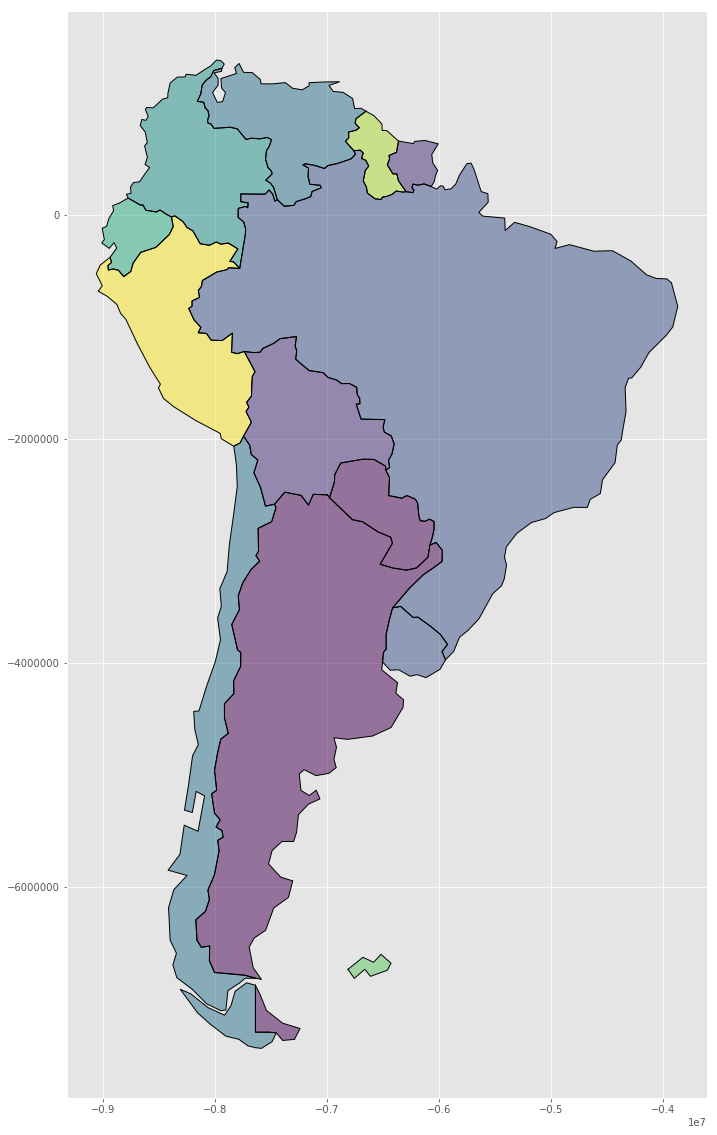

In [17]:
# Look at countries
countries.plot()

In [18]:
# Now buffer cities to find area within 500km.
# Check CRS -- world Mercator, units of meters.
capitals.crs

'+init=epsg:3395'

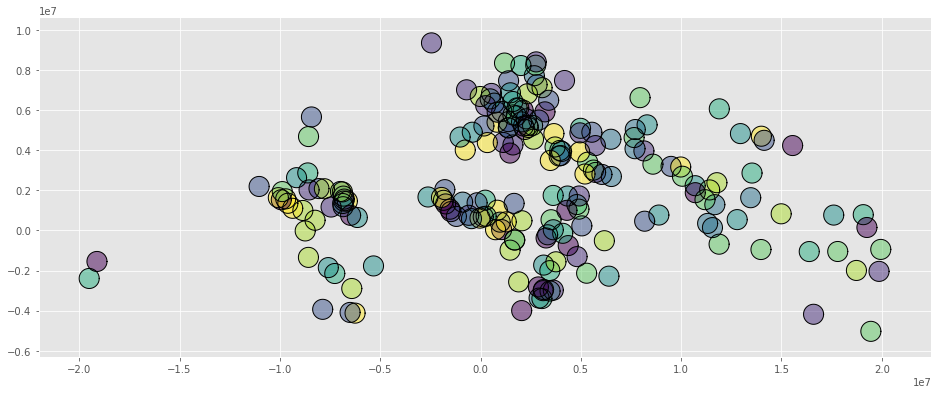

In [19]:
# Make 500km buffer
capitals['geometry'] = capitals.buffer(500000)
capitals.plot();

- To select only the portion of countries within 500km of a capital, we specify the ```how``` option to be "intersect", which creates a new set of polygons where these two layers overlap:

In [20]:
country_cores = gpd.overlay(countries, capitals, how='intersection')

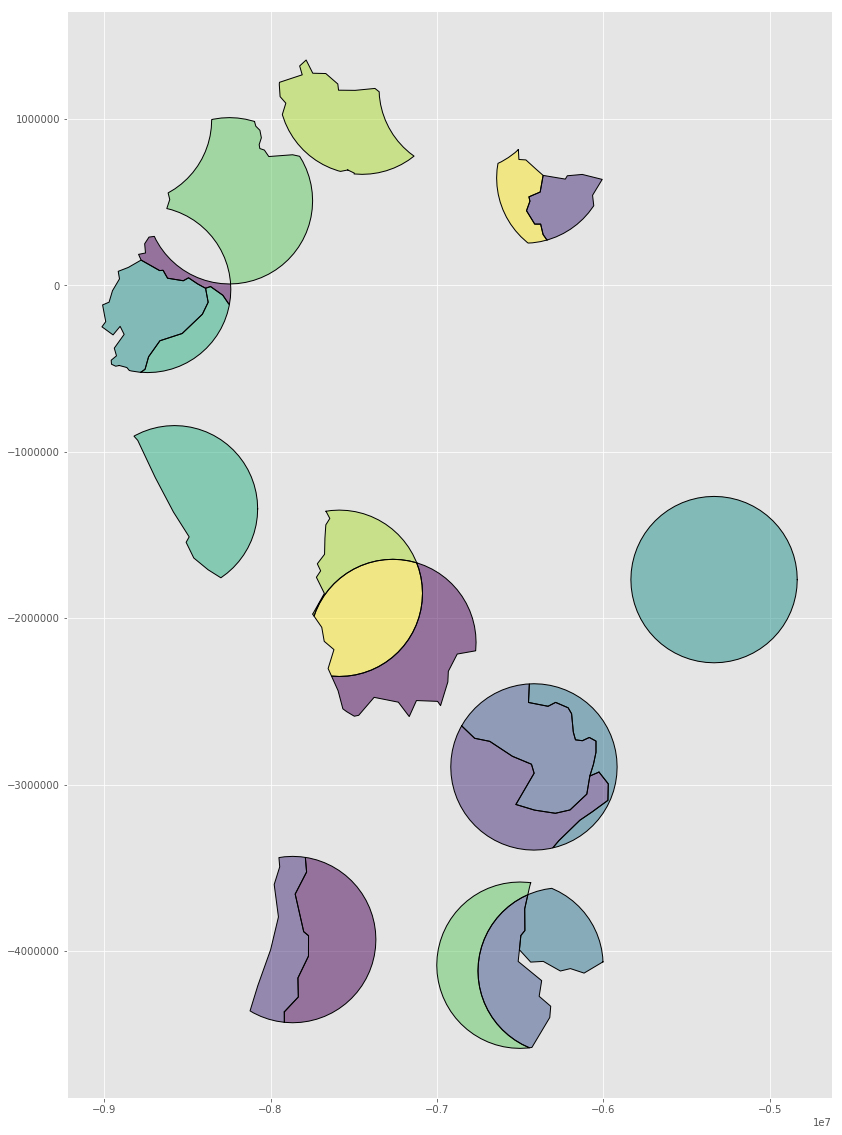

In [21]:
country_cores.plot()

 - Changing the "how" option allows for different types of overlay operations. For example, if we were intersected in the portions of countries far from capitals (the peripheries), we would compute the difference of the two.

In [22]:
country_peripheries = gpd.overlay(countries, capitals, how='difference')

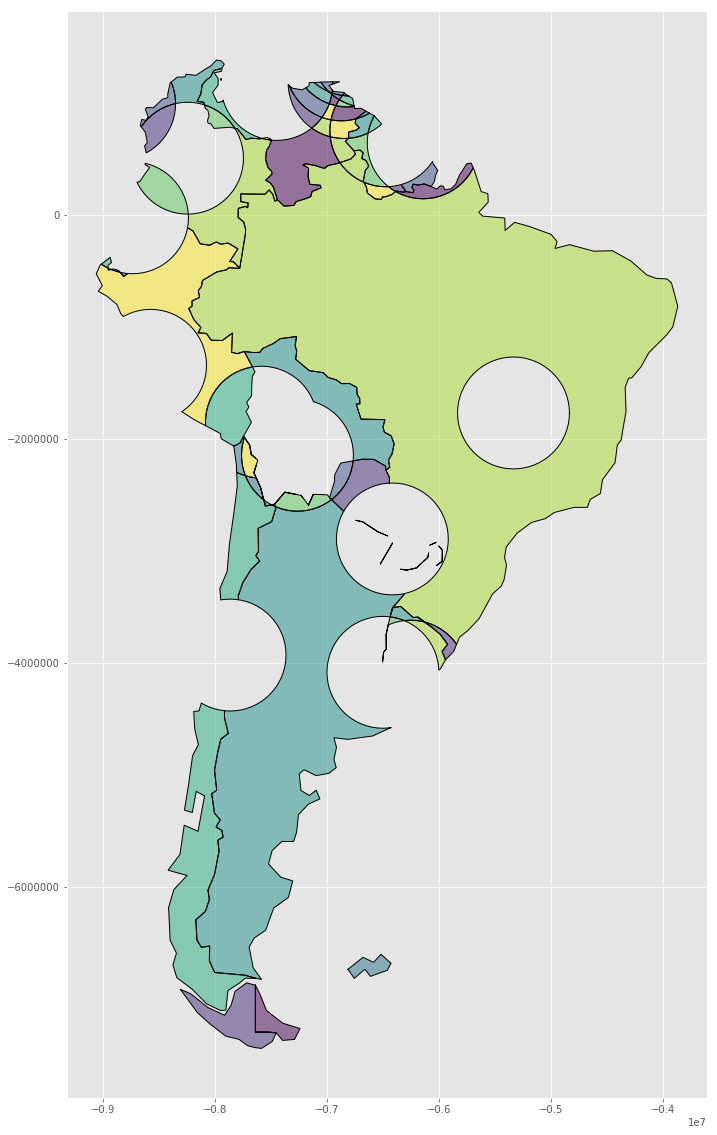

In [23]:
country_peripheries.plot()